# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The exponential distribution https://en.wikipedia.org/wiki/Exponential_distribution is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake. 

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

In [2]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

### Question 1: /10 Marks

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test your function by calling it with `lamb = 2` and `y = np.array([1, 4, 6, 0])`.

Test your function by calling it with `lamb = np.array([1, 0.5, 2, 5])` and  `y = np.array([1.5, 2.1, 3.4, 0])`.

Answer in markdown:

* What happens when you set an element of lamb to 0 or a negative number. Why?

In [3]:
def exponentialNegLogLikelihood(lamb, y):
    neg_log_lik = -np.sum(np.log(lamb) - y * (lamb))
    return neg_log_lik
#4 pts

In [4]:
# Test the function
lamb = 2
y = np.array([1, 4, 6, 0])
exponentialNegLogLikelihood(lamb, y)
# 1pt

19.227411277760222

In [5]:
# What happens when you call the function with lamb=np.array([1, 0.5, 2, 5]) and y=np.array([1.5, 2.1, 3.4, 0])?
lamb = np.array([1, 0.5, 2, 5])
y = np.array([1.5, 2.1, 3.4, 0])
print(f"{exponentialNegLogLikelihood(lamb, y)}")
# 1 pt

7.740562087565899


In [6]:
# What happens when you set an element of lam to 0 or a negative number. Why?
lamb = 0
y = np.array([1.5, 2.1, 3.4, 0])
print(exponentialNegLogLikelihood(lamb, y))
# 1 pt

inf


/var/folders/ls/r3k1n_891_nf47gq9lchwwr40000gn/T/ipykernel_89994/3980655123.py:2: RuntimeWarning: divide by zero encountered in log
  neg_log_lik = -np.sum(np.log(lamb) - y * (lamb))


In [7]:
lamb = -1
y = np.array([1.5, 2.1, 3.4, 0])
exponentialNegLogLikelihood(lamb, y)
#1 pt

/var/folders/ls/r3k1n_891_nf47gq9lchwwr40000gn/T/ipykernel_89994/3980655123.py:2: RuntimeWarning: invalid value encountered in log
  neg_log_lik = -np.sum(np.log(lamb) - y * (lamb))


nan

**Written Answer:** 

1.[1pt] When the element of lamb is set to 0, then the result is `inf` since $$\lim_{x \rightarrow 0^+}\ln(x)=-\infty.$$ If lamb is a negative number, the result is nan which means not a number and this is because the logarithm is not defined for a negative number. 

---

### Question 2: /15 Marks

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

In [8]:
def exponentialRegressionNegLogLikelihood(b, X, y):
    # Here we have to be carefull since the mean of the exponential distribution is not the same $\lambda$ parameter.
    lamb = np.exp(-X @ b)
    # Use exponentialNegLogLikelihood to compute the likelihood
    neg_log_lik = exponentialNegLogLikelihood(lamb, y)
    return neg_log_lik

In [9]:
# Test your function 
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
exponentialRegressionNegLogLikelihood(b, X, y)

26.60556862451103

### Question 3: /10 Marks

a) In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?.


b) What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$?: 

No more than 2 lines for each answer.

---


a)[5 pts] If $\lambda$ has the form of $\mathbf{X}\beta$, we cannot guarantee that $\lambda$ always has positive values. If $\lambda$ is zero or negative, then log of $\lambda$ will be undefined as required for the `exponentialNegLogLikelihood`function.

b)[5 pts] When $\exp(-\mathbf{X}\beta)$ is used, we guarantee that the parameter $\lambda$ of the exponential distribution is positive.

### Question 4: /2.5 Marks

Define a function called `Prediction` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`

In [10]:
def Prediction(b, X):
    yhat = np.exp(X @ b)
    return yhat

In [11]:
# Test the function
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
np.round(Prediction(b, X),2)

array([ 2980.96, 66171.16,  1808.04])

### Question 5: /15 Marks

Define a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

Write the estimated coefficient $b$.

In [12]:
def Model_fit(X, y):
    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    nrows, ncols = X.shape
    beta_start = np.zeros((ncols, 1))
    # Minimize the appropriate likelihood function
    mle = minimize(exponentialRegressionNegLogLikelihood, beta_start, args = (X, y), method = "Powell")
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas
# 10 pts

In [13]:
# Show the code to find estimated b
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
print(f"The estimated b is {Model_fit(X, y)}")
# 5 pts
# Consider here the answer could vary depending on the b_start but should be near to [1.1 -0.7]

The estimated b is [ 1.17119176 -0.72067184]


### Question 6: /2.5 Marks

Define a function called `Squared_residual` which accepts as its first argument a design matrix $\mathbf{X}$, its second argument a vector of $\mathbf{y}$ and its third argument a vector $\beta$. Its output should be squared residual of the exponential regression model. This residual is defined as 

$$
\text{squared-residual} = \dfrac{1}{n}\sum_i (y_i-\hat{y}_i)^2
$$

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([2980, 66171, 1808])`
* `b = np.array([1, 3])`


In [14]:
def Squared_residual(X,y,b):
    y_hat = Prediction(b,X)
    return np.mean(np.square(y-y_hat))

In [15]:
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([2980, 66171, 1808])
Squared_residual(X,y,b)

0.315064022352556

### Question 7: /20 Mark(s)

Use the data `exponential_regression.csv`, where $y$ represents time units to fit a exponential regression using the functions that you already have created. 

* What are the estimated coefficients?
* Plot a scatterplot of the data that includes the model prediction over $x \in [-2.14, 2.14]$. Do not forget to include a graph title.
* Report the Squared residual in the plot

In [16]:
# Loading in the data.  
# Notice that this file is separated by semicolon
df = pd.read_csv('exponential_regression.csv', sep = ';')

# Create the design matrix
x = df.x.values 
X = np.c_[np.ones(x.shape), x]
y = df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = Model_fit(X, y)
print(f'The estimated coefficients are :{betas}')
# 10 pts

The estimated coefficients are :[ 0.07120564 -1.75117875]


/Users/danielguerrero/miniforge3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


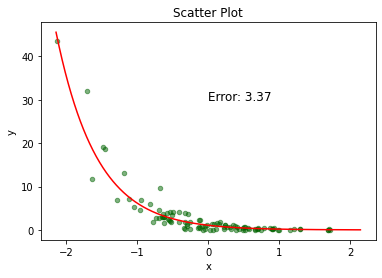

In [17]:
# Scatterplot the data. 
scatter1 = df.plot.scatter(x = 'x', y = 'y', color = 'DarkGreen', alpha = 0.5)
scatter1.set_title('Scatter Plot')

# Create the new data to graphic the prediction
newx = np.linspace(-2.14, 2.14, 1001)
newX = np.c_[np.ones(newx.size), newx]

# Predictions on the new data
y_predicted = Prediction(betas, newX)

# Squared error
sr = Squared_residual(X,df.y.values,betas)

# Finally, plot the predictions on the same axis and color the predictions red
scatter1.plot(newx, y_predicted, color = 'red')
scatter1.annotate(f"Error: {sr:.2f}",(0,30),fontsize=12)
plt.show()
# 10 pts

### Question 8:  /10 Marks

Fit a linear regression (ordinary least squares) to the data, and obtain parameter estimates and and plot the predictions over the same range. Report the Squared residual in the plot


The estimated coefficients using linear regression are [ 0.         -5.11409159]


/Users/danielguerrero/miniforge3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 30, 'Error: 29736420.33')

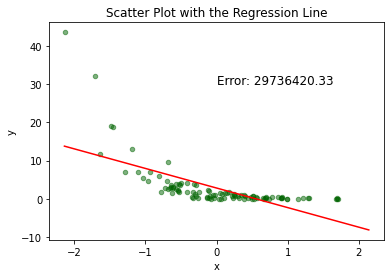

In [18]:
# fit the linear regression model
ols_fit = LinearRegression().fit(X, y)
betas_r = ols_fit.coef_ 
print(f'The estimated coefficients using linear regression are {betas_r}')
# 5 pts

# Make predictions on the new data
y_predicted = ols_fit.predict(newX)


# Squared error
sr_r = Squared_residual(X,df.y.values,betas_r)


# Plot a scatter plot of the data and your model's predictions
scatter2 = df.plot.scatter(x = 'x', y = 'y', color = 'DarkGreen', alpha = 0.5)
scatter2.plot(newx, y_predicted, color = 'red')
scatter2.set_title('Scatter Plot with the Regression Line')
scatter2.annotate(f"Error: {sr_r:.2f}",(0,30),fontsize=12)
# 15 pts

### Question 9:  /10 Marks

Fit a linear regression (ordinary least squares) to the data with a square term, and obtain parameter estimates and and plot the predictions over the same range. Report the Squared residual in the plot.

Note that in this case the matrix X should look like 

$X =[[1,x_1,x_1^2],[1,x_2,x_2^2],...]$


The estimated coefficients using linear regression are [ 0.         -4.96170882  4.34031982]


/Users/danielguerrero/miniforge3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0, 30, 'Error: 2054208442129692581953536.00')

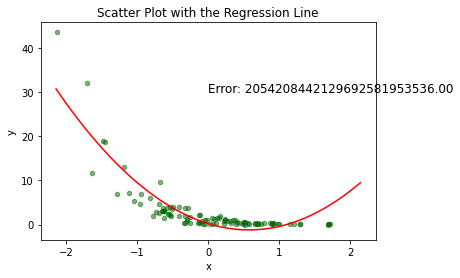

In [19]:
# fit the linear regression model
ols_fit = LinearRegression().fit(np.c_[X, np.square(X[:,1])], y)
betas_sq = ols_fit.coef_ 
print(f'The estimated coefficients using linear regression are {betas_sq}')
# 5 pts

# Make predictions on the new data
y_predicted = ols_fit.predict(np.c_[newX, np.square(newX[:,1])])

# Squared error
sr_sq = Squared_residual(np.c_[X, np.square(X[:,1])],df.y.values,betas_sq)

# Plot a scatter plot of the data and your model's predictions
scatter2 = df.plot.scatter(x = 'x', y = 'y', color = 'DarkGreen', alpha = 0.5)
scatter2.plot(newx, y_predicted, color = 'red')
scatter2.set_title('Scatter Plot with the Regression Line')
scatter2.annotate(f"Error: {sr_sq:.2f}",(0,30),fontsize=12)
# 15 pts

### Question 10: /5 Mark(s)

Between this three models which one would you select? What is the major problem with predictions from the other two models? Remember that in this case $y$ is measured in time units.

#### Answer

In this case, the linear regression model underestimates the values of $y$ for $x \in [-2.14, -1.5] \cup [1, 2.14]$. Indeed there is a more significant problem which is some predictions are negative, and this does not make sense with the fact that the model is intended to predict time values. This problem does not occur with the exponential regression model. In the case the squared linear the problem is that it does not follow the trend when $x>1$.

In [20]:
assert np.round(exponentialNegLogLikelihood(2, np.array([1, 4, 6, 0])),2)==19.23, "Q1 Incorrect -10"
print("Q1 Correct +10")
assert np.round(exponentialRegressionNegLogLikelihood(np.array([1, 3]), np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T, np.array([0, 2.5, 10])),2) == 26.61, "Q2 Incorrect -15"
print("Q2 Correct +15")
assert (np.round(Prediction(b = np.array([1, 3]), X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T),2) == np.array([ 2980.96, 66171.16,  1808.04])).all , "Q2 Incorrect -15"
print("Q4 Correct +2.5")
assert (np.round(Model_fit(np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T, np.array([0, 2.5, 10])),2) == np.array([1.17,-0.72])).all, "Q5 Incorrect -15"
print("Q5 Correct +15")
assert np.round(Squared_residual(np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T,np.array([2980, 66171, 1808]),np.array([1, 3])),2) == 0.32, "Q6 Incorrect -2.5"
print("Q6 Correct +2.5")
assert (np.round(Model_fit(np.c_[np.ones(x.shape), x], y = df.y.values),2) == np.array([0.07,-1.75])).all , "Q7 Incorrect -20"
print("Q7 Correct +20")

Q1 Correct +10
Q2 Correct +15
Q4 Correct +2.5
Q5 Correct +15
Q6 Correct +2.5
Q7 Correct +20


### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.